In [1]:
import sys
print(f"Using Python Version: {(sys.version).split()[0]}")

Using Python Version: 3.12.9


We'll need some special functions:

In [2]:
from math import cos, sin

Import plotting (note the commented-out command to install, if not already available. Need to restart the kernel after install)

In [ ]:
#!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt
from collections.abc import Callable
import numpy as np

# Fixed-Point Iteration

In [4]:
def fixed_point(func: Callable[[float],float], x: float, eps: float = 1.e-08, N_max: int = 100) -> list[float]:
    """fixed-point iteration for scalar function

    Arguments:
      func: The function for which the fixed-point is to be found
      x: initial guess 
      eps: convergence tolerance (default 1.0e-08)
      N_max: maximum number of iterations (default 100)

    Returns:
      conv_history: convergence history of the fixed-point iteration
    """

    f_val = func(x)
    counter = 0
    conv_history = [x]

    print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")

    delta = f_val -x
    
    while abs(delta) > eps:

        x = f_val
        f_val = func(x)
        delta = f_val-x
        conv_history.append(x)

        counter += 1
        print(f"{counter:4d} {x:.6e} {abs(f_val-x):.6e}")

        if counter >= N_max:
            raise RuntimeError(f"Failed to converge after {N_max} iterations")

    return conv_history

In [5]:
conv_history_fp = fixed_point(func=lambda x: cos(x), x=1.2)

   0 1.200000e+00 3.623578e-01
   1 3.623578e-01 5.727059e-01
   2 9.350636e-01 3.412964e-01
   3 5.937672e-01 2.350716e-01
   4 8.288389e-01 1.531067e-01
   5 6.757321e-01 1.045171e-01
   6 7.802492e-01 6.951098e-02
   7 7.107382e-01 4.714222e-02
   8 7.578805e-01 3.158588e-02
   9 7.262946e-01 2.134573e-02
  10 7.476403e-01 1.434503e-02
  11 7.332953e-01 9.677552e-03
  12 7.429728e-01 6.512084e-03
  13 7.364608e-01 4.389650e-03
  14 7.408504e-01 2.955525e-03
  15 7.378949e-01 1.991504e-03
  16 7.398864e-01 1.341215e-03
  17 7.385452e-01 9.035877e-04
  18 7.394488e-01 6.086087e-04
  19 7.388401e-01 4.099928e-04
  20 7.392501e-01 2.761640e-04
  21 7.389740e-01 1.860329e-04
  22 7.391600e-01 1.253115e-04
  23 7.390347e-01 8.441245e-05
  24 7.391191e-01 5.686073e-05
  25 7.390622e-01 3.830230e-05
  26 7.391005e-01 2.580079e-05
  27 7.390747e-01 1.737977e-05
  28 7.390921e-01 1.170720e-05
  29 7.390804e-01 7.886120e-06
  30 7.390883e-01 5.312181e-06
  31 7.390830e-01 3.578351e-06
  32 7.3

In [6]:
conv_history_ex = fixed_point(func=lambda x: cos(x), x=1.2, eps = 1.e-12)
x_ex = conv_history_ex[-1]

   0 1.200000e+00 3.623578e-01
   1 3.623578e-01 5.727059e-01
   2 9.350636e-01 3.412964e-01
   3 5.937672e-01 2.350716e-01
   4 8.288389e-01 1.531067e-01
   5 6.757321e-01 1.045171e-01
   6 7.802492e-01 6.951098e-02
   7 7.107382e-01 4.714222e-02
   8 7.578805e-01 3.158588e-02
   9 7.262946e-01 2.134573e-02
  10 7.476403e-01 1.434503e-02
  11 7.332953e-01 9.677552e-03
  12 7.429728e-01 6.512084e-03
  13 7.364608e-01 4.389650e-03
  14 7.408504e-01 2.955525e-03
  15 7.378949e-01 1.991504e-03
  16 7.398864e-01 1.341215e-03
  17 7.385452e-01 9.035877e-04
  18 7.394488e-01 6.086087e-04
  19 7.388401e-01 4.099928e-04
  20 7.392501e-01 2.761640e-04
  21 7.389740e-01 1.860329e-04
  22 7.391600e-01 1.253115e-04
  23 7.390347e-01 8.441245e-05
  24 7.391191e-01 5.686073e-05
  25 7.390622e-01 3.830230e-05
  26 7.391005e-01 2.580079e-05
  27 7.390747e-01 1.737977e-05
  28 7.390921e-01 1.170720e-05
  29 7.390804e-01 7.886120e-06
  30 7.390883e-01 5.312181e-06
  31 7.390830e-01 3.578351e-06
  32 7.3

Postprocess the result. Note: lists don't allow abs(list). Can use list comprehension (or numpy array)

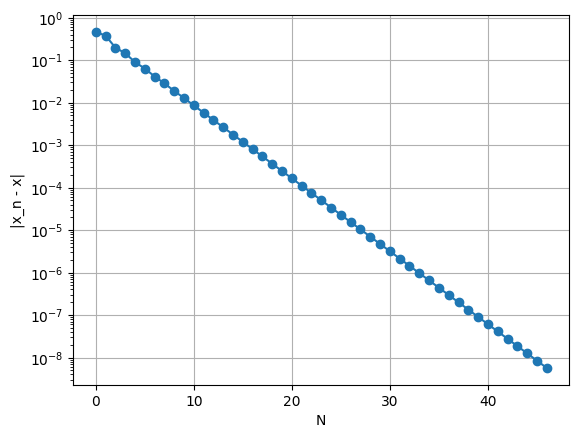

In [7]:
plt.semilogy(range(len(conv_history_fp)), [abs(x_ex - x) for x in conv_history_fp], marker='o', label='|x_n - x|')
plt.xlabel('N')
plt.ylabel('|x_n - x|')
plt.grid()

# Newton Iteration

In [8]:
def newton(
    func: Callable[[float],float], fprime: Callable[[float],float], x: float, eps: float = 1.0e-10, N_max = 100
) -> list[float]:
    """
    Newton-Raphson method for scalar function

    Arguments:
        func: The function for which the root is to be found
        fprime: The derivative of the function
        x: initial guess
        eps: convergence tolerance (default 1.0e-10)
        N_max: maximum number of iterations (default 100)

    Returns:
        conv_history: convergence history of the root approximation
    """

    f_val = func(x)
    f_der = fprime(x)
    counter = 0

    print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")

    conv_history = [x]

    while abs(f_val) > eps:

        if abs(f_der) < 1.e-12:
            raise ValueError(f"Detected zero derivative (x = {x:.6e}) f'(x) = {f_der:.6e})")
        
        x -= f_val / f_der
        f_val = func(x)
        f_der = fprime(x)

        conv_history.append(x)

        counter += 1
        print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")
        
        if counter >= N_max:
            raise RuntimeError(f"Newton iteration failed to converge after {N_max} iterations")

    return conv_history

We can now call the Newton Routine with a lambda:

In [9]:
conv_history_newton = newton(func=lambda x: x - cos(x), fprime=lambda x: 1 + sin(x), x=1.2)

   0 1.200000e+00 8.376422e-01
   1 7.664465e-01 4.606671e-02
   2 7.392457e-01 2.688083e-04
   3 7.390851e-01 9.530950e-09
   4 7.390851e-01 0.000000e+00


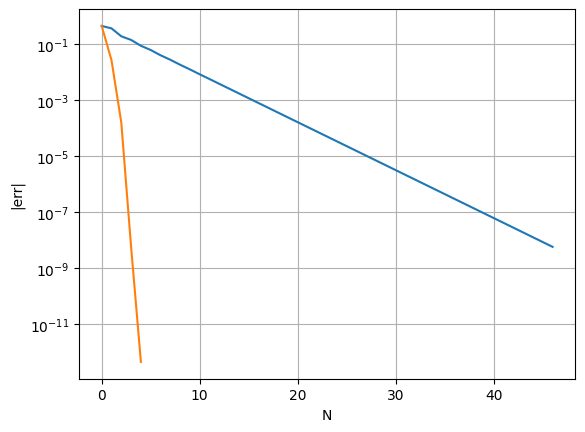

In [10]:
N_fp = range(len(conv_history_fp))
N_newton = range(len(conv_history_newton))

plt.semilogy(N_fp,[abs(x-x_ex) for x in conv_history_fp],N_newton, [abs(x-x_ex) for x in conv_history_newton])
plt.xlabel('N')
plt.ylabel('|err|')
plt.grid()